In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [48]:
tX.shape

(250000, 30)

In [49]:
from proj1_helpers import *
from implementations import * # Our functions

DATA_TRAIN_PATH = 'data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)
bias = np.ones(x.shape[0]).reshape((x.shape[0], 1))
tx = np.hstack((bias, x))

In [43]:
print("red: ", y[y==-1].shape[0], "\nblue: ", y[y==1].shape[0])

red:  164333 
blue:  85667


In [44]:
def plot_distr(y0, y1):
    y0 = np.vectorize(int)(y0)
    y1 = np.vectorize(int)(y1)
    plt.hist(y0, bins=50, color=to_rgba('red', alpha=0.5))
    plt.hist(y1, bins=50, color=to_rgba('blue', alpha=0.5))
    plt.show()
    print('\n\n\n')

Feature  0 :


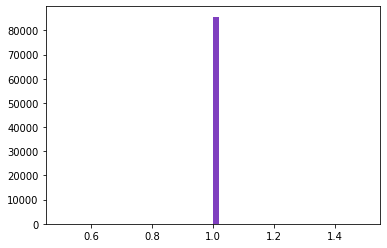





Feature  1 :


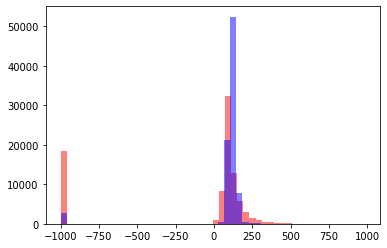





Feature  2 :


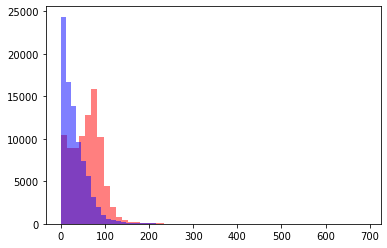





Feature  3 :


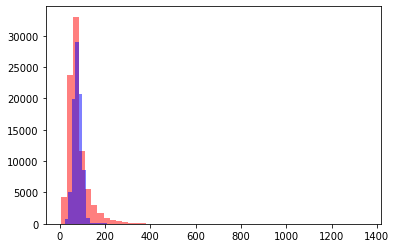





Feature  4 :


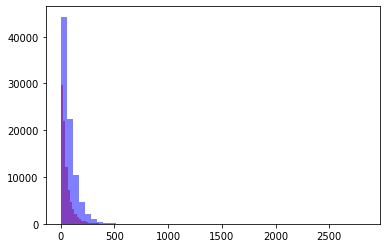





Feature  5 :


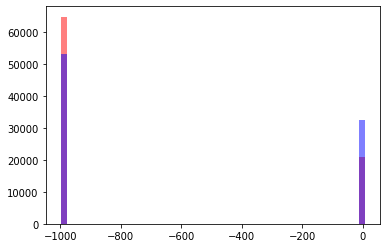





Feature  6 :


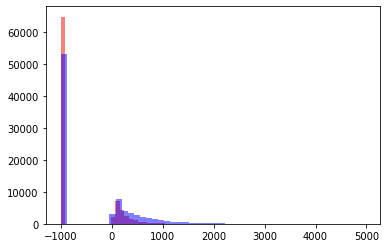





Feature  7 :


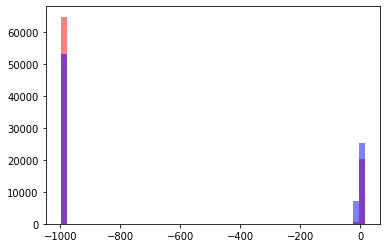





Feature  8 :


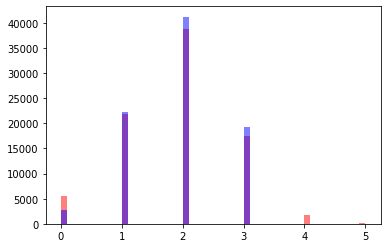





Feature  9 :


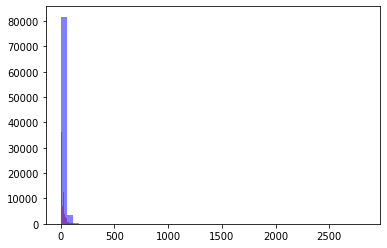





Feature  10 :


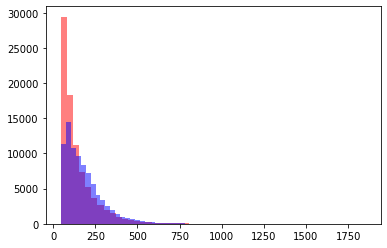





Feature  11 :


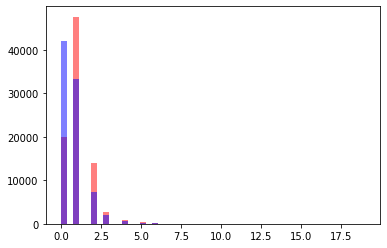





Feature  12 :


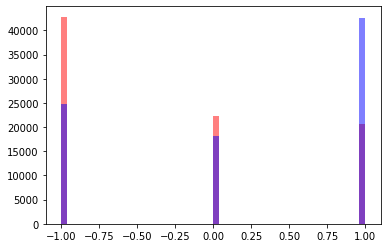





Feature  13 :


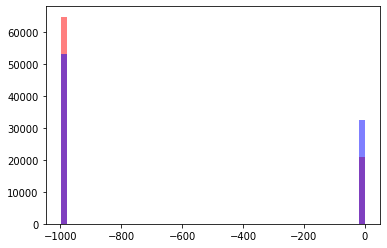





Feature  14 :


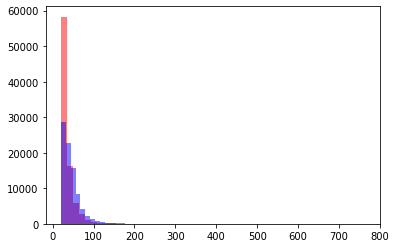





Feature  15 :


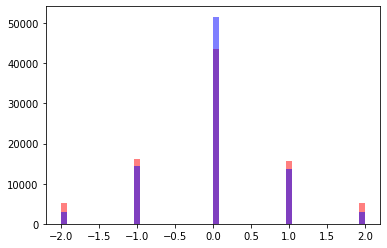





Feature  16 :


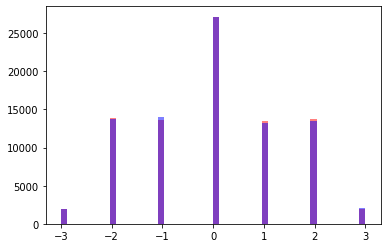





Feature  17 :


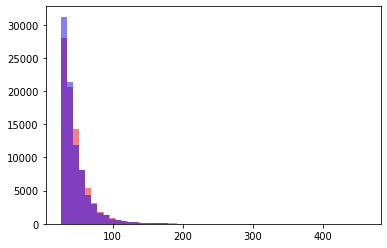





Feature  18 :


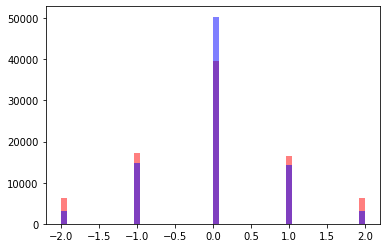





Feature  19 :


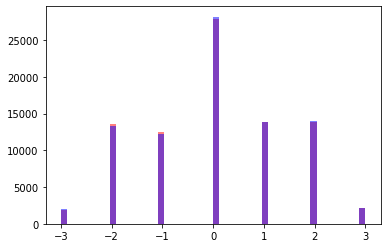





Feature  20 :


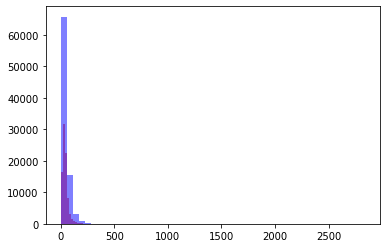





Feature  21 :


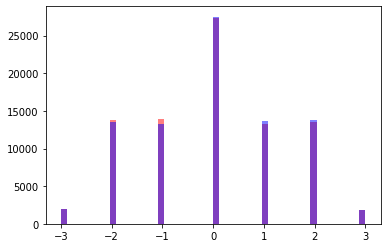





Feature  22 :


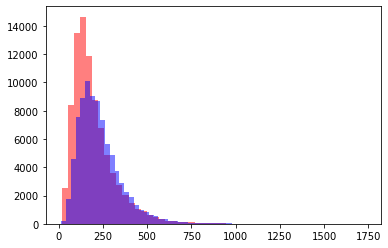





Feature  23 :


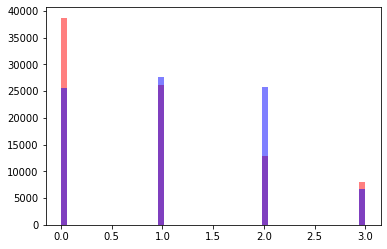





Feature  24 :


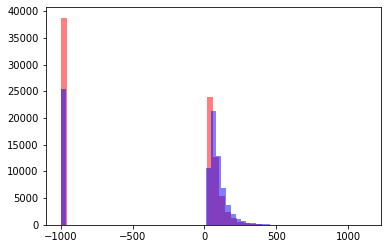





Feature  25 :


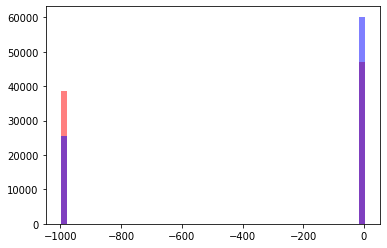





Feature  26 :


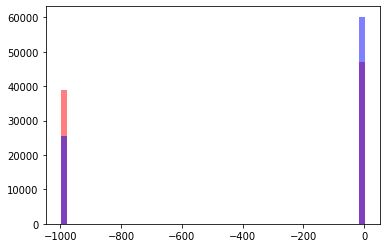





Feature  27 :


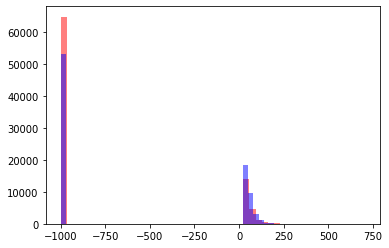





Feature  28 :


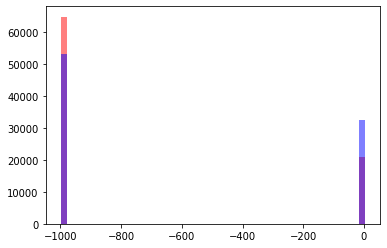





Feature  29 :


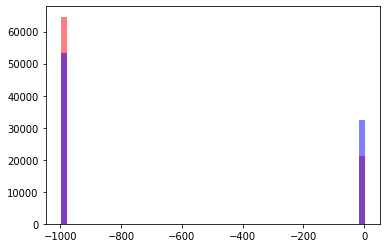

In [50]:
from matplotlib.colors import to_rgba
for i in range(0,30):
    print("Feature ", i,":")
    y1 = tx[:, i][y==1]
    y0 = tx[:, i][y==-1]
    sub_y0 = np.random.choice(y0, size=y1.shape[0], replace=False)
    plot_distr(sub_y0, y1)

## Generate predictions and save ouput in csv format for submission:

In [12]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

OSError:  not found.

In [13]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined